In [73]:
import pandas as pd
import numpy as np
from pandas import datetime
import matplotlib.pyplot as plt
%matplotlib inline

from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 18, 6

In [74]:
unrate = pd.read_csv("UnemploymentRate1.csv")
#parse strings to datetime type
unrate['Date']=pd.to_datetime(unrate['Date'],infer_datetime_format=True)
indexedDataset=unrate.set_index(['Date'])

In [75]:
from datetime import datetime

indexedDataset.head(5)

,UNRATE
Date,
2010-01-01,9.8
2010-02-01,9.8
2010-03-01,9.9
2010-04-01,9.9
2010-05-01,9.6


In [76]:
#indexedDataset = indexedDataset.iloc[:-8]

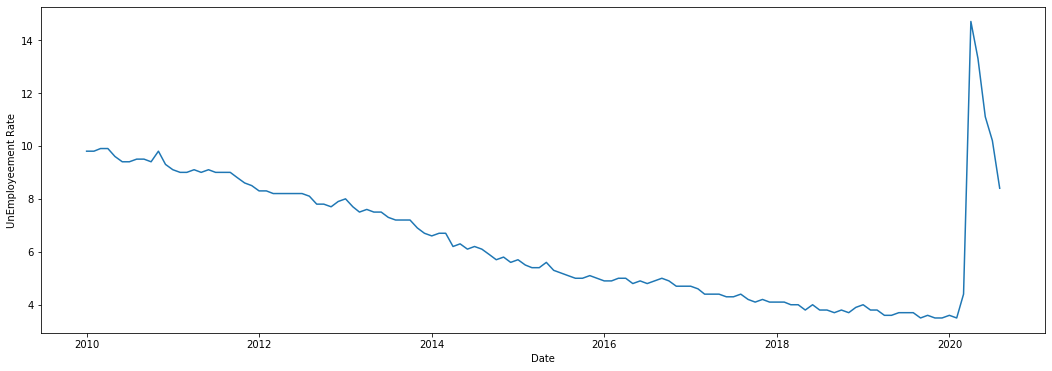

In [77]:
#Plot graph
plt.xlabel("Date")
plt.ylabel("UnEmployeement Rate")
plt.plot(indexedDataset)

In [78]:
#Determinig rolling statistics
rolmean=indexedDataset.rolling(window=12).mean()
rolstd=indexedDataset.rolling(window=12).std()
print(rolmean,rolstd)

              UNRATE
Date                
2010-01-01       NaN
2010-02-01       NaN
2010-03-01       NaN
2010-04-01       NaN
2010-05-01       NaN
2010-06-01       NaN
2010-07-01       NaN
2010-08-01       NaN
2010-09-01       NaN
2010-10-01       NaN
2010-11-01       NaN
2010-12-01  9.608333
2011-01-01  9.550000
2011-02-01  9.483333
2011-03-01  9.408333
2011-04-01  9.341667
2011-05-01  9.291667
2011-06-01  9.266667
2011-07-01  9.233333
2011-08-01  9.191667
2011-09-01  9.150000
2011-10-01  9.100000
2011-11-01  9.000000
2011-12-01  8.933333
2012-01-01  8.866667
2012-02-01  8.808333
2012-03-01  8.741667
2012-04-01  8.666667
2012-05-01  8.600000
2012-06-01  8.525000
...              ...
2018-03-01  4.216667
2018-04-01  4.183333
2018-05-01  4.133333
2018-06-01  4.108333
2018-07-01  4.066667
2018-08-01  4.016667
2018-09-01  3.975000
2018-10-01  3.950000
2018-11-01  3.908333
2018-12-01  3.891667
2019-01-01  3.883333
2019-02-01  3.858333
2019-03-01  3.841667
2019-04-01  3.808333
2019-05-01  3

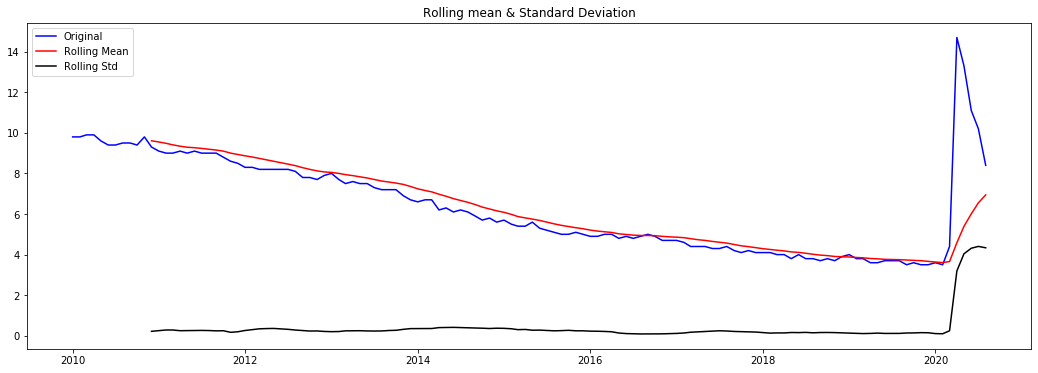

In [79]:
#plot rolling statistics:
orig=plt.plot(indexedDataset, color='blue',label='Original')
mean=plt.plot(rolmean, color='red',label='Rolling Mean')
std=plt.plot(rolstd, color='black',label='Rolling Std')
plt.legend(loc='best')
plt.title("Rolling mean & Standard Deviation")
plt.show(block=False)

In [80]:
#perform Dickey-Fuller test:
from statsmodels.tsa.stattools import adfuller

print('Results of Dickey-Fuller Test')
dftest=adfuller(indexedDataset['UNRATE'], autolag='AIC')

dfoutput=pd.Series(dftest[0:4], index=['Test Statistics','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key]=value
    
print(dfoutput)

Results of Dickey-Fuller Test
Test Statistics                 -2.560018
p-value                          0.101545
#Lags Used                       0.000000
Number of Observations Used    127.000000
Critical Value (1%)             -3.482920
Critical Value (5%)             -2.884580
Critical Value (10%)            -2.579058
dtype: float64


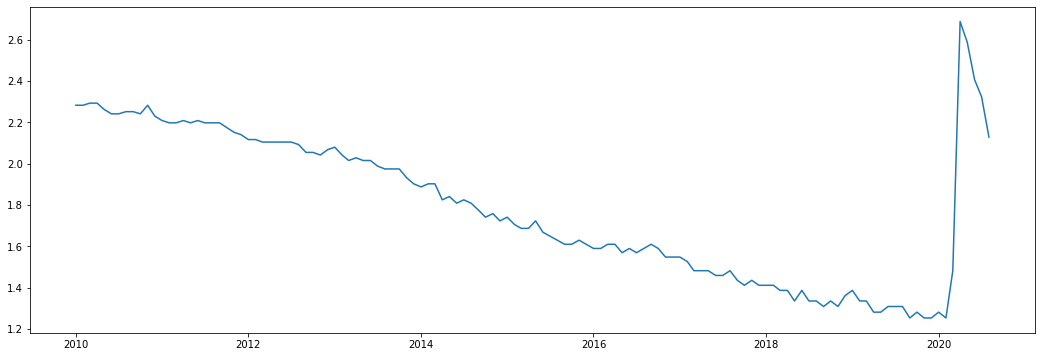

In [81]:
#Estimated Trend
indexedDataset_logScale=np.log(indexedDataset)
plt.plot(indexedDataset_logScale)

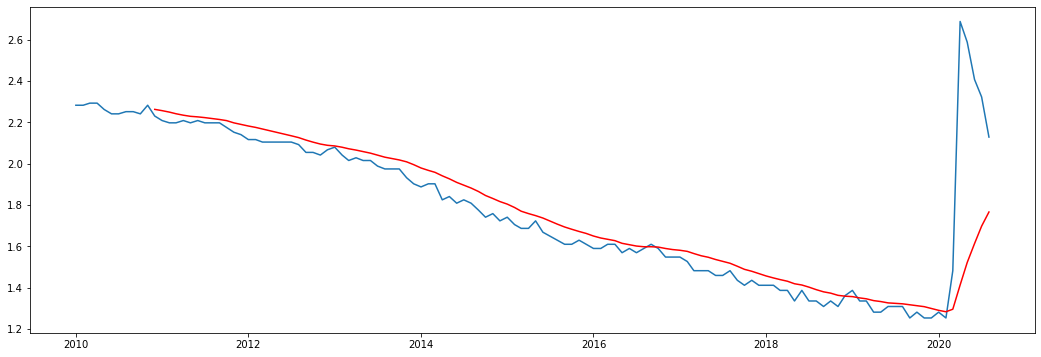

In [82]:
#Moving Average
movingAverage=indexedDataset_logScale.rolling(window=12).mean()
movingStd=indexedDataset_logScale.rolling(window=12).std()
plt.plot(indexedDataset_logScale)
plt.plot(movingAverage,color='red')

In [83]:
datasetLogScaleMinusMovingAverage=indexedDataset_logScale-movingAverage
datasetLogScaleMinusMovingAverage.head(5)

#Remove NAN values
datasetLogScaleMinusMovingAverage.dropna(inplace=True)
datasetLogScaleMinusMovingAverage.head(10)

,UNRATE
Date,
2010-12-01,-0.032378
2011-01-01,-0.047942
2011-02-01,-0.051896
2011-03-01,-0.043953
2011-04-01,-0.025881
2011-05-01,-0.031553
2011-06-01,-0.017800
2011-07-01,-0.025226
2011-08-01,-0.020721


In [84]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    # Determing rolling statistics
   
    movingAverage = timeseries.rolling(window=12).mean()
    movingStd=timeseries.rolling(window=12).std()
    
    #plot rolling statistics:
    orig=plt.plot(timeseries, color='blue',label='Original')
    mean=plt.plot(movingAverage, color='red',label='Rolling Mean')
    std=plt.plot(movingStd, color='black',label='Rolling Std')
    plt.legend(loc='best')
    plt.title("Rolling mean & Standard Deviation")
    plt.show(block=False)
    
    # Perform Augmented Dickey-Fuller test:
    print('Results of Dickey-Fuller Test')
    dftest=adfuller(timeseries['UNRATE'], autolag='AIC')

    dfoutput=pd.Series(dftest[0:4], index=['Test Statistics','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key]=value
    
    print(dfoutput)

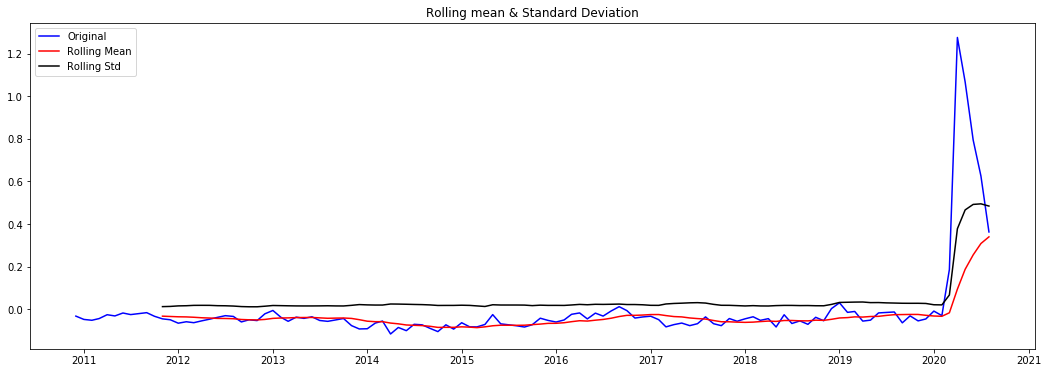

Results of Dickey-Fuller Test
Test Statistics                 -3.736743
p-value                          0.003625
#Lags Used                       1.000000
Number of Observations Used    115.000000
Critical Value (1%)             -3.488535
Critical Value (5%)             -2.887020
Critical Value (10%)            -2.580360
dtype: float64


In [85]:
test_stationarity(datasetLogScaleMinusMovingAverage)

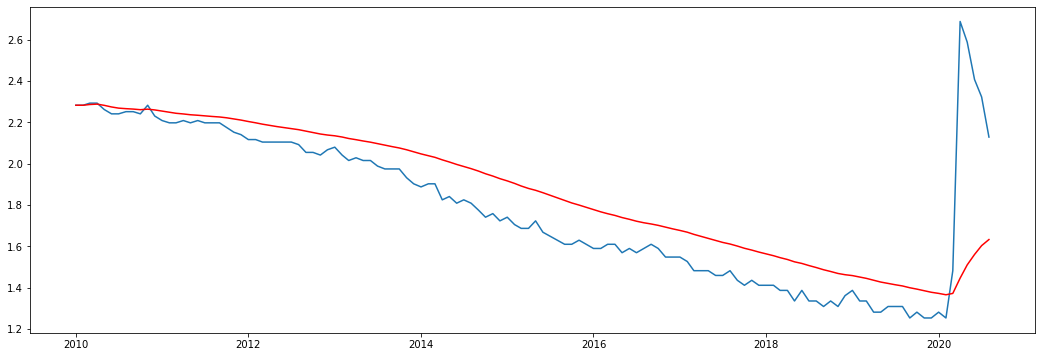

In [86]:
exponentialDecayWeightedAverage=indexedDataset_logScale.ewm(halflife=12, min_periods=0, adjust=True).mean()
plt.plot(indexedDataset_logScale)
plt.plot(exponentialDecayWeightedAverage,color='red')

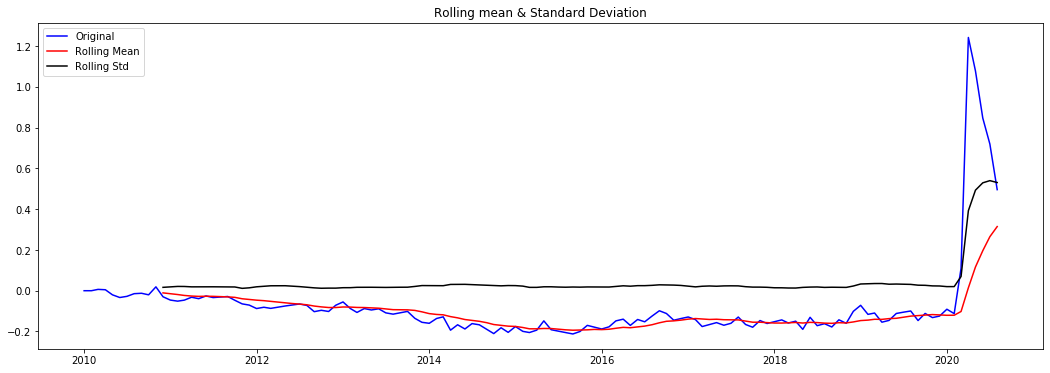

Results of Dickey-Fuller Test
Test Statistics                 -3.110677
p-value                          0.025773
#Lags Used                       1.000000
Number of Observations Used    126.000000
Critical Value (1%)             -3.483346
Critical Value (5%)             -2.884766
Critical Value (10%)            -2.579156
dtype: float64


In [87]:
datasetLogScaleMinusMovingexponentialDecayAverage=indexedDataset_logScale - exponentialDecayWeightedAverage
test_stationarity(datasetLogScaleMinusMovingexponentialDecayAverage)

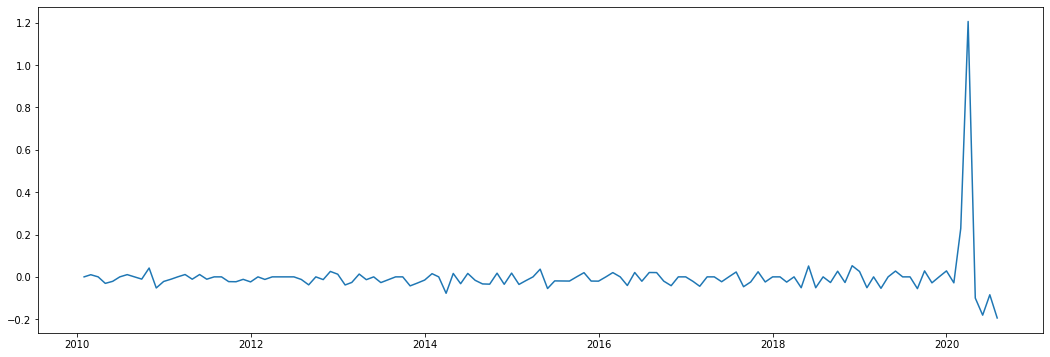

In [88]:
datasetLogDiffShifting = indexedDataset_logScale - indexedDataset_logScale.shift()
plt.plot(datasetLogDiffShifting)

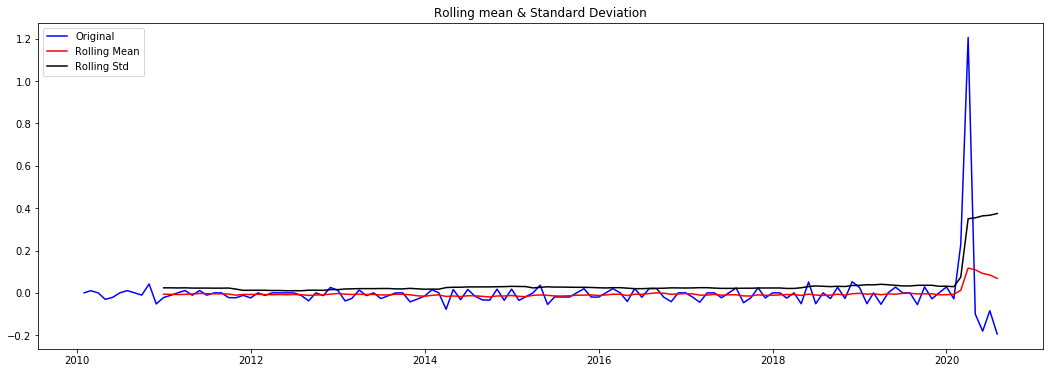

Results of Dickey-Fuller Test
Test Statistics               -8.397512e+00
p-value                        2.277867e-13
#Lags Used                     1.000000e+00
Number of Observations Used    1.250000e+02
Critical Value (1%)           -3.483779e+00
Critical Value (5%)           -2.884954e+00
Critical Value (10%)          -2.579257e+00
dtype: float64


In [89]:
datasetLogDiffShifting.dropna(inplace=True)
test_stationarity(datasetLogDiffShifting)

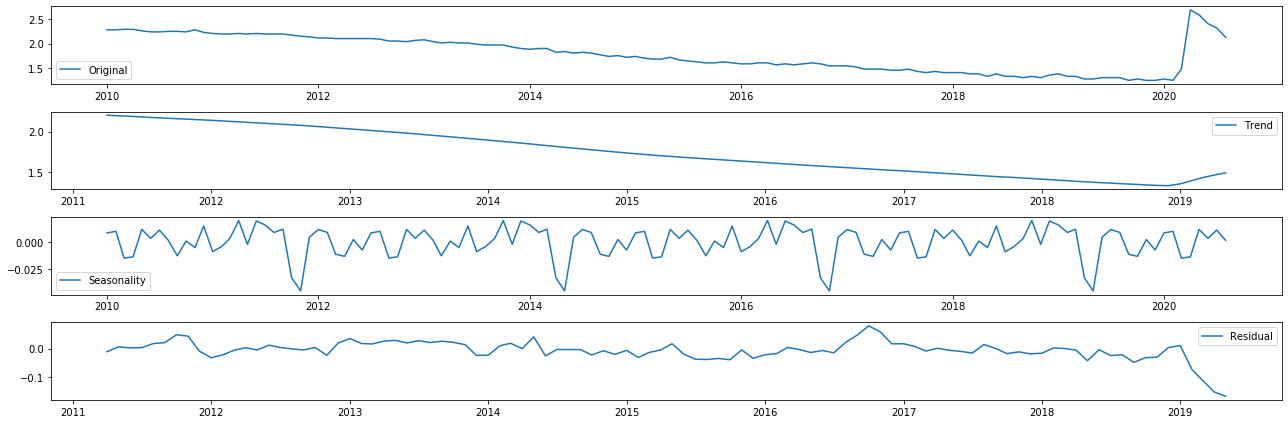

In [90]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(indexedDataset_logScale,freq=30)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(indexedDataset_logScale, label='Original')
plt.legend(loc='best')

plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')

plt.subplot(413)
plt.plot(seasonal, label='Seasonality')
plt.legend(loc='best')

plt.subplot(414)
plt.plot(residual, label='Residual')
plt.legend(loc='best')

plt.tight_layout()



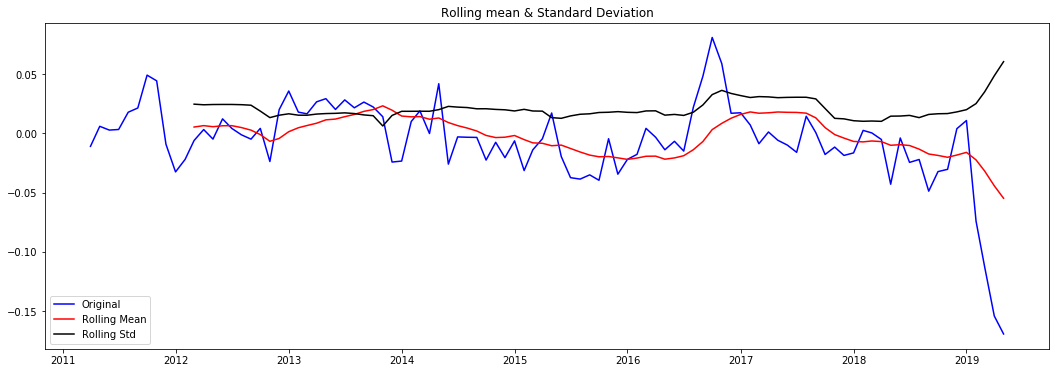

Results of Dickey-Fuller Test
Test Statistics                -1.700934
p-value                         0.430631
#Lags Used                      0.000000
Number of Observations Used    97.000000
Critical Value (1%)            -3.499637
Critical Value (5%)            -2.891831
Critical Value (10%)           -2.582928
dtype: float64


In [91]:
decomposedLogData=residual
decomposedLogData.dropna(inplace=True)
test_stationarity(decomposedLogData)

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:541: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(msg, FutureWarning)


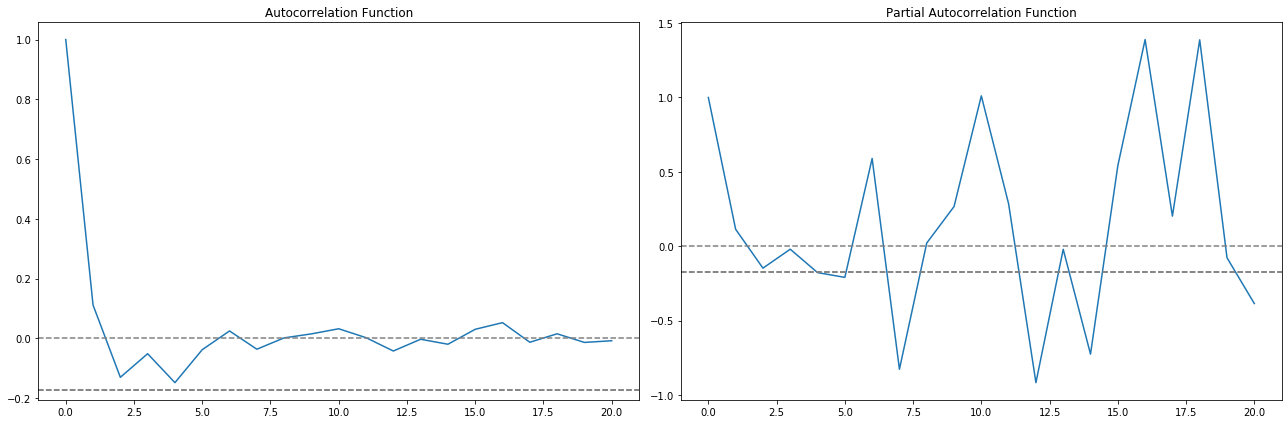

In [92]:
# We found out d value
# Now try to find 
# acf (Auto correlation function) for q
# pacf(Partial ACF) for p 

from statsmodels.tsa.stattools import acf, pacf
lag_acf = acf(datasetLogDiffShifting, nlags = 20)
lag_pacf = pacf(datasetLogDiffShifting, nlags=20, method='ols') # Ordinary Least Square Method

# Plot ACF:
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--', color='grey')
plt.axhline(y=-1.96/np.sqrt(len(datasetLogDiffShifting)),linestyle='--', color='grey')
plt.axhline(y=-1.96/np.sqrt(len(datasetLogDiffShifting)),linestyle='--', color='grey')
plt.title('Autocorrelation Function')

# Plot PACF:
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--', color='grey')
plt.axhline(y=-1.96/np.sqrt(len(datasetLogDiffShifting)),linestyle='--', color='grey')
plt.axhline(y=-1.96/np.sqrt(len(datasetLogDiffShifting)),linestyle='--', color='grey')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Plotting AR MODEL


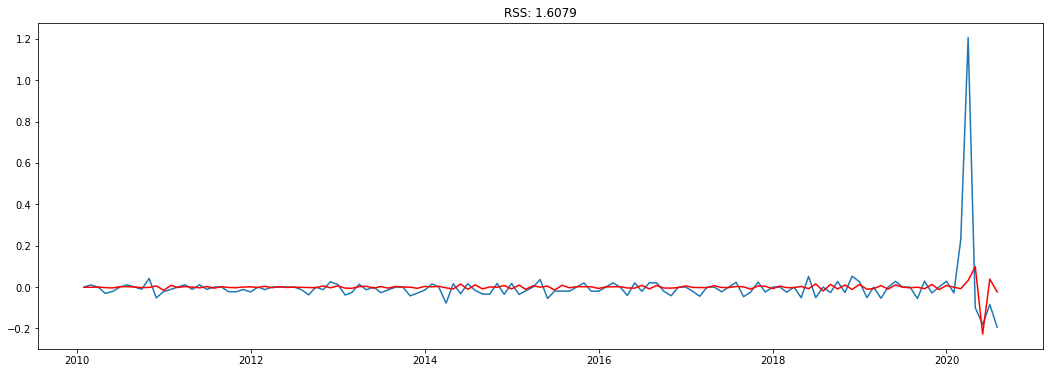

In [93]:
# Obser first time dropped 
# ACF value should be 2
# PACF value should be 2
# We got all these value from data after period

# Now apply ARIMA on actual data with these parametter
#AR MODEL:

from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(indexedDataset_logScale, order=(0,1,2))
results_AR = model.fit(disp=-1)
plt.plot(datasetLogDiffShifting)
plt.plot(results_AR.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_AR.fittedvalues - datasetLogDiffShifting['UNRATE'])**2))
print('Plotting AR MODEL')

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Plotting MA MODEL


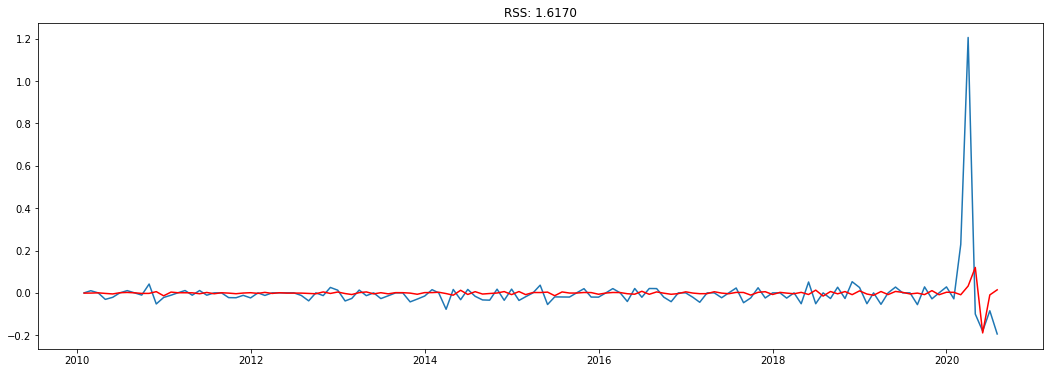

In [94]:
#MA MODEL:

model = ARIMA(indexedDataset_logScale, order=(2,1,0))
results_MA = model.fit(disp=-1)
plt.plot(datasetLogDiffShifting)
plt.plot(results_MA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_MA.fittedvalues - datasetLogDiffShifting['UNRATE'])**2))
print('Plotting MA MODEL')

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
No handles with labels found to put in legend.


Plotting ARIMA MODEL


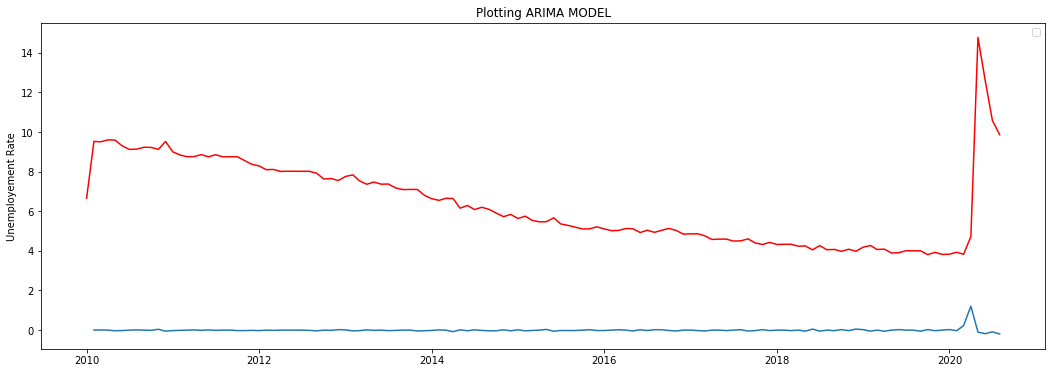

In [95]:
#ARIMA MODEL:

model = ARIMA(indexedDataset, order=(2,0,2))
results_ARIMA = model.fit(disp=-1)
plt.plot(datasetLogDiffShifting)
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_ARIMA.fittedvalues - datasetLogDiffShifting['UNRATE'])**2))
print('Plotting ARIMA MODEL')


plt.ylabel('Unemployement Rate')
plt.title('Plotting ARIMA MODEL')
plt.legend()

In [96]:
predictions_ARIMA_diff=pd.Series(results_ARIMA.fittedvalues, copy=True)
print(predictions_ARIMA_diff.head())

Date
2010-01-01    6.656256
2010-02-01    9.523755
2010-03-01    9.501919
2010-04-01    9.600556
2010-05-01    9.590833
dtype: float64


In [97]:
#convert to cumulative sum
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
print(predictions_ARIMA_diff_cumsum.head())

Date
2010-01-01     6.656256
2010-02-01    16.180010
2010-03-01    25.681929
2010-04-01    35.282485
2010-05-01    44.873318
dtype: float64


In [108]:
predictions_ARIMA_log = pd.Series(indexedDataset_logScale['UNRATE'].ix[0],index=indexedDataset_logScale.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum,fill_value=0)
predictions_ARIMA_log.head()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


Date
2010-01-01     8.938638
2010-02-01    18.462393
2010-03-01    27.964312
2010-04-01    37.564868
2010-05-01    47.155701
dtype: float64

In [112]:
indexedDataset.head(101)

,UNRATE
Date,
2010-01-01,9.8
2010-02-01,9.8
2010-03-01,9.9
2010-04-01,9.9
2010-05-01,9.6
2010-06-01,9.4
2010-07-01,9.4
2010-08-01,9.5
2010-09-01,9.5


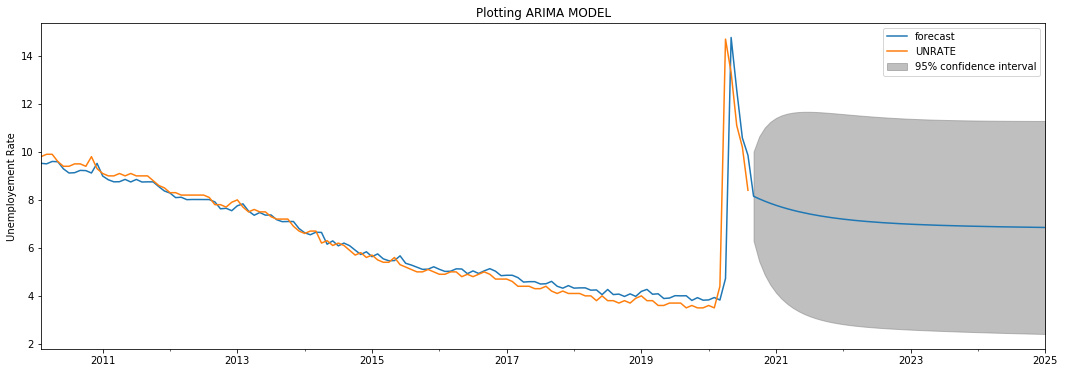

In [113]:
results_ARIMA.plot_predict(1,180)
x=results_ARIMA.forecast(steps=60)

plt.ylabel('Unemployement Rate')
plt.title('Plotting ARIMA MODEL')
plt.legend()

In [150]:
k=results_ARIMA.predict(100,180)


In [156]:
k.index.name='Date'

In [157]:
col=['Predicted values']
k.to_csv('unemprate.csv',header=col)


In [116]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,mean_squared_log_error


# MEAN SQUARED ERROR
The lower the MSE the higher the accuracy of prediction

In [119]:
mean_squared_error(indexedDataset.UNRATE, indexedDataset_logScale)

24.875664744621957

# MEAN ABSOLUTE ERROR

In [120]:
mean_absolute_error(indexedDataset.UNRATE, indexedDataset_logScale)

4.582771757290608

# MEAN SQUARED LOG ERROR

In [121]:
mean_squared_log_error(indexedDataset.UNRATE, indexedDataset_logScale)

0.9024520348090284